# Importing Essential Libraries

In [1254]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Loading

In [1255]:
dataset = pd.read_csv('car data.csv')

# # EDA

In [1256]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [1257]:
dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [1258]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [1259]:
print(dataset.Transmission.value_counts())
print("------------")
print(dataset.Seller_Type.value_counts())
print("------------")
print(dataset.Fuel_Type.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
------------
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


# # Data Processing


# Encoding The Categorical Features

In [1260]:
from sklearn.preprocessing import OneHotEncoder

# drop first category to avoid multicollinearity
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_data = encoder.fit_transform(dataset[["Fuel_Type", "Seller_Type", "Transmission"]])

# Get the new column names after encoding
column_names = encoder.get_feature_names_out(["Fuel_Type", "Seller_Type", "Transmission"])
encoded_df = pd.DataFrame(encoded_data, columns=column_names, index=dataset.index)

dataset = dataset.drop(columns=["Fuel_Type", "Seller_Type", "Transmission"])
dataset = pd.concat([dataset, encoded_df], axis=1)

In [1261]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0.0,1.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,1.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,1.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1.0,0.0,0.0,1.0
297,brio,2015,4.00,5.90,60000,0,0.0,1.0,0.0,1.0
298,city,2009,3.35,11.00,87934,0,0.0,1.0,0.0,1.0
299,city,2017,11.50,12.50,9000,0,1.0,0.0,0.0,1.0


# Splitting The Data

In [1262]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Car_Name','Selling_Price'], axis=1)
y = dataset["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=41)

# Scaling The Data

In [1263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training And Evaluation

1.   Linear Regression

In [1264]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [1265]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8288835553566598


Visualization

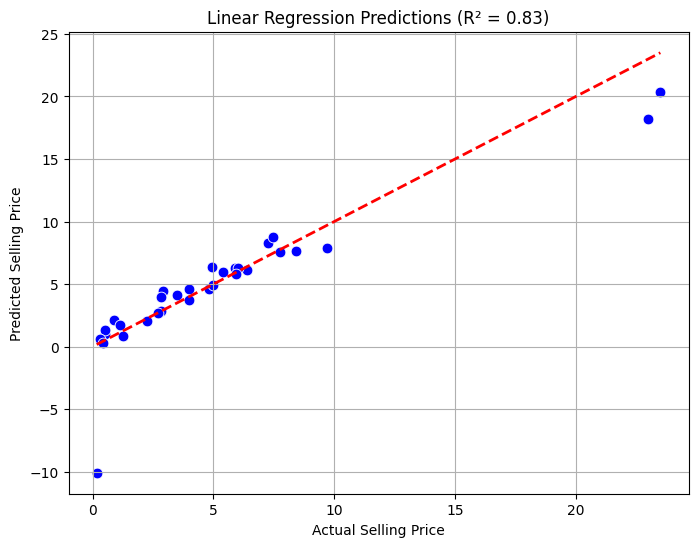

In [1266]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title(f"Linear Regression Predictions (R² = {r2:.2f})")
plt.grid(True)
plt.show()

2. Lasso Regression

In [1267]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.3)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.3)

In [1268]:
lasso.coef_
#The most important feature is Present_Price.

array([ 1.00832796,  3.66329143, -0.09426082, -0.        ,  0.54939122,
       -0.        , -0.40422046, -0.13059585])

In [1269]:
y_pred_lasso = lasso.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(r2_lasso)

0.8978479512931652


Visualization

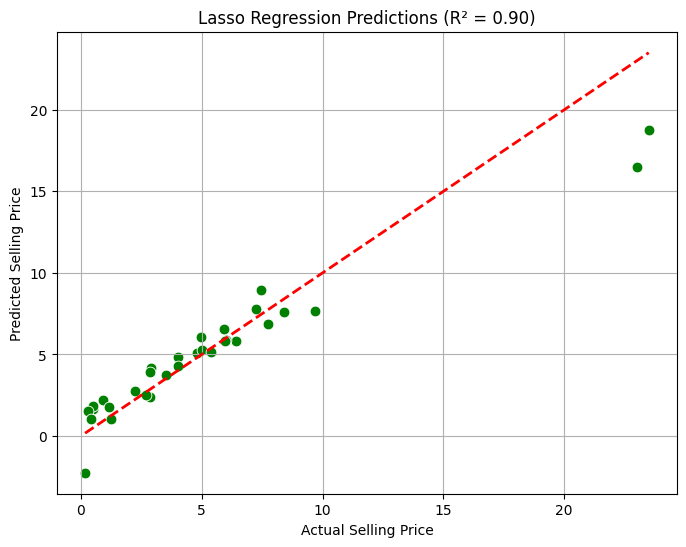

In [1270]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lasso, color='green', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title(f"Lasso Regression Predictions (R² = {r2_lasso:.2f})")
plt.grid(True)
plt.show()